In [ ]:
import pandas as pd
import numpy as  np

np.random.seed(42)

cgpa=np.round(np.random.uniform(1.0,4.0,200),2)

base_packages =  np.random.uniform(1.0,5.0,200)

package=np.round(base_packages*(cgpa/4),2)

df=pd.DataFrame({
    'Student id ':range(1,201),
    'CGPA':cgpa,
    'Package_LPA':package
})
file_path = 'D:/python/student_cgpa_salary_data.xlsx'
df.to_excel(file_path, index=False)



In [ ]:
import pandas as pd

# 1. Load the Excel file
file_path = 'D:/python/student_cgpa_salary_data.xlsx'
df = pd.read_excel(file_path)

# 2. Inspect the data
print(df.head())             # Display first 5 rows
print(df.info())             # Data types and non-null counts
print(df.describe())         # Statistical summary for numeric columns
print(df.columns.tolist())   # List all column names

# 3. Clean column names: remove leading/trailing spaces and replace spaces with underscores
df.columns = df.columns.str.strip().str.replace(' ', '_')

# 4. Check for missing values
print(df.isnull().sum())

# 5. Handle missing data by dropping rows with any null values
df.dropna(inplace=True)

# 6. Validate data ranges for CGPA and Package_LPA
print("Invalid CGPA entries:")
print(df[(df['CGPA'] < 1.0) | (df['CGPA'] > 4.0)])

print("Invalid Package_LPA entries:")
print(df[df['Package_LPA'] < 0])

# 7. Ensure correct data types
df['Student_id'] = df['Student_id'].astype(int)
df['CGPA'] = df['CGPA'].astype(float)
df['Package_LPA'] = df['Package_LPA'].astype(float)

# 8. Save the cleaned DataFrame back to a new Excel file
cleaned_path = 'D:/python/cleaned_studentf_cgpa_salary_data.xlsx'
df.to_excel(cleaned_path, index=False)










   Student id   CGPA  Package_LPA
0            1  2.12         1.89
1            2  3.85         1.29
2            3  3.20         1.32
3            4  2.80         3.22
4            5  1.47         1.26
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Student id   200 non-null    int64  
 1   CGPA         200 non-null    float64
 2   Package_LPA  199 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.8 KB
None
       Student id         CGPA  Package_LPA
count   200.000000  200.000000   199.000000
mean    100.500000    2.474450     1.856231
std      57.879185    0.880493     0.958373
min       1.000000    1.020000     0.330000
25%      50.750000    1.717500     1.115000
50%     100.500000    2.520000     1.690000
75%     150.250000    3.270000     2.535000
max     200.000000    3.960000     4.210000
['Student id ', 'CGPA', 'Packag

Mean Squared Error (MSE): 0.5825
R-squared (R2) score: 0.3146


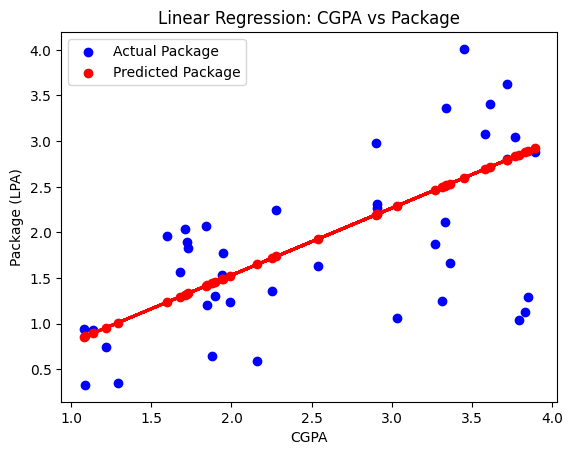

C:\Users\User\AppData\Local\Temp\ipykernel_8784\2392310660.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_package_per_bin = df.groupby('CGPA_bin')['Package_LPA'].mean().reset_index()


     CGPA_bin  Package_LPA
0  (1.0, 1.5]     0.923714
1  (1.5, 2.0]     1.433171
2  (2.0, 2.5]     1.536522
3  (2.5, 3.0]     2.184118
4  (3.0, 3.5]     2.458529
5  (3.5, 4.0]     2.659687
Exiting prediction.


In [ ]:
import pandas as pd
import numpy as  np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Load the cleaned data
cleaned_path = 'D:/python/cleaned_student_cgpa_salary_data.xlsx'
df = pd.read_excel(cleaned_path)

# 2. Define features and target
X = df[['CGPA']]           # Feature(s) - must be 2D array
y = df['Package_LPA']      # Target variable

# 3. Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=30
)

# 4. Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Predict on test data
y_pred = model.predict(X_test)

# 6. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2) score: {r2:.4f}")

# 7. Visualize actual vs predicted
plt.scatter(X_test, y_test, color='blue', label='Actual Package')
plt.scatter(X_test, y_pred, color='red', label='Predicted Package')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('CGPA')
plt.ylabel('Package (LPA)')
plt.title('Linear Regression: CGPA vs Package')
plt.legend()
plt.show()

avg = np.arange(1, 4.5, 0.5)  # bins from 1.0 to 4.0 step 0.5
df['CGPA_bin'] = pd.cut(df['CGPA'], avg)

avg_package_per_bin = df.groupby('CGPA_bin')['Package_LPA'].mean().reset_index()

print(avg_package_per_bin)


# 9. Predict package based on user input CGPA
def predict_package():
    while True:
        cgpa_str = input("Enter the CGPA (between 1.0 and 4.0), or 'q' to quit: ")
        if cgpa_str.lower() == 'q':
            print("Exiting prediction.")
            break
        try:
            cgpa_input = float(cgpa_str)#Converts the input string to a float.
            if cgpa_input < 1.0 or cgpa_input > 4.0:
                print("Please enter a CGPA in the range 1.0 to 4.0")
                continue
            predicted_package = model.predict([[cgpa_input]])[0]
            print(f"Predicted Package for CGPA {cgpa_input}: {predicted_package:.2f} LPA\n")
        except ValueError:
            print("Invalid input. Please enter a numeric value or 'q' to quit.")

predict_package()




In [ ]:
''' 
1. What is Simple Linear Regression?
Answer:
Simple Linear Regression is a statistical method used to model the relationship between two continuous variables — one independent variable (X) and one dependent variable (y). 
It finds the best-fitting straight line  y=mx+b that predicts y from X.



2. What is the equation of a linear regression line?

3. What are the assumptions of linear regression?
Answer:

Linearity: The relationship between X and y is linear.

Independence: Observations are independent of each other.

Homoscedasticity: Constant variance of errors.

Normality: Residuals (errors) are normally distributed.


4. Why do we split data into train and test sets?
Answer:
To evaluate how well the model generalizes to unseen data. Training data is used to fit the model; testing data is used to assess performance.

5. What does the R² Score tell you?
Answer:
It measures how well the regression line fits the data. It ranges from 0 to 1. A higher R² means the model explains more of the variance in the target variable.

6.What would you do if your model has a low R² score?
Answer:
I would:

Check for outliers or missing variables,

Consider using multiple linear regression if more predictors are available,

Try non-linear models if the relationship isn’t linear.

What is overfitting? Can it happen in simple linear regression?
Answer:
Overfitting happens when a model learns noise instead of the actual pattern. It’s rare in simple linear regression but possible if the data is small or noisy


9. What’s the difference between MAE and MSE?
Answer:

MAE (Mean Absolute Error): Average of absolute errors. Less sensitive to outliers.

MSE (Mean Squared Error): Squares the errors, penalizing larger errors more. More sensitive to outliers

10. Why use MSE instead of MAE sometimes?
Answer:
MSE is differentiable and works better in optimization algorithms like gradient descent. It penalizes larger errors more, which is useful in some applications.

11. What are alternatives to R² score?
Answer:

Adjusted R² (for multiple regression)

MAE, MSE, RMSE (Root Mean Squared Error)

Mean Absolute Percentage Error (MAPE)

12. What does a scatter plot tell you before fitting a model?
Answer:
It helps you visually assess whether there’s a linear relationship between X and y. If it’s curved or scattered, linear regression might not be appropriate.

13. If the data has a curve, will linear regression work?
Answer:
No. In that case, a polynomial regression or non-linear model like decision trees or SVR would be better.

14. How would you handle outliers in your data?
Answer:

Visualize with scatter plots or boxplots,

Remove or transform the outliers,

Try robust regression or use MAE instead of MSE.


20. Can linear regression be used for classification tasks?
Answer:
Not ideally. Logistic regression is better suited for classification. Linear regression doesn’t output probabilities between 0 and 1.

'''